Temperature (°C) https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/db

/content/drive/My Drive/Colab Notebooks/db


In [3]:
!ls

API_19_DS2_en_csv_v2_2254744.csv
API_AG.LND.AGRI.K2_DS2_en_csv_v2_2255753.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_2255650.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_2256478.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2252956.csv
API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv
covid_19_data.csv
GlobalLandTemperaturesByCountry.csv
london_merged.csv
meteorite-landings.csv
poblacion.csv
test.csv
text.csv


In [4]:
import pandas as pd
import numpy as np

In [5]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [6]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [7]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [8]:
df_temp['date'] = pd.to_datetime(df_temp['dt'])
df_temp['date']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: date, Length: 577462, dtype: datetime64[ns]

In [9]:
idx = df_temp['date'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,date
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [10]:
# agrupar por pais y agrupar por anio obteniendo el promedio de temperatura y la mediana de temperatura
df_t_avg = df_temp.groupby(['Country',
                 pd.Grouper(key = 'date',
                            freq = '1Y')
                 ]).agg({'AverageTemperature':[np.mean, np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     date                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

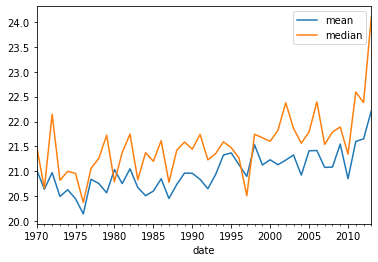

In [11]:
# xs para acceder a un elemento del indice
# temperatura promedio y mediana de Mexico
df_t_avg.xs('Mexico')['AverageTemperature'].plot()

In [12]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,date,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [13]:
# obtener los anios de la columna de fechas
df_t_med['year'] = df_t_med['date'].dt.year
df_t_med['year']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: year, Length: 10692, dtype: int64

In [14]:
# renombrar una columna
df_t_med.rename(columns = {'median': 'temperature'}, inplace=True)
df_t_med

,Country,date,temperature,year
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [15]:
# crear tabla pivote para adecuar la observacion de los paises
df_t_pivot = df_t_med.pivot_table(values = 'temperature', index = 'date', columns='Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-12-31,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,11.1180,28.6180,8.6480,21.9360,6.3550,12.4300,25.6190,27.4460,25.5650,27.9370,27.0110,6.5360,10.6590,26.4620,27.0670,13.1690,21.9350,28.3010,10.0870,23.4400,25.4440,26.7220,11.5200,28.1070,25.7410,19.9750,27.1040,24.4220,-1.6320,24.7480,...,22.6690,1.2720,14.4880,13.7550,27.6430,28.3390,26.4830,-5.8620,19.2560,3.2700,7.4020,19.4770,24.2230,6.4740,22.3660,26.8520,26.8290,27.0600,23.6180,26.4450,20.1740,12.9030,17.4190,26.8910,22.8360,10.0670,28.9860,9.7340,9.9730,8.2860,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971-12-31,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,8.6390,28.0850,8.1845,22.2985,7.1385,10.7060,25.4960,25.5135,25.3280,26.3180,26.4790,5.7755,10.0065,25.2630,26.9295,12.6415,21.2455,27.2900,10.1885,23.9550,24.9120,26.2470,9.5820,27.9310,24.7345,19.6260,27.0150,24.0725,-3.4755,23.6530,...,21.9110,1.5420,11.9565,12.6455,27.1535,27.9145,25.8920,-10.5280,19.5295,1.6720,8.5215,17.1220,22.1795,5.8390,22.3920,26.6300,26.4135,26.3805,23.8420,26.0095,19.6470,10.6395,14.9685,26.7755,22.7355,7.4325,27.8175,8.7785,8.9780,8.7545,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972-12-31,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,11.4950,28.6780,8.6445,22.3470,5.3755,13.6880,25.8145,26.3535,26.0285,26.9035,27.0225,6.0925,8.7840,25.8145,26.7025,12.5800,21.9525,27.8050,9.7260,23.0225,25.1430,26.6150,10.6495,28.2305,25.4830,20.0425,27.2160,24.1850,-6.6775,23.6670,...,22.3110,0.4455,12.5585,12.2105,27.4820,28.9775,26.1590,-5.9665,19.9670,2.2865,6.1615,19.4300,23.0640,4.9110,22.6910,26.9205,26.2535,27.0445,23.2235,26.4690,18.6385,13.2440,16.3415,27.1115,23.2850,9.0295,28.0485,8.6235,8.7990,8.2290,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973-12-31,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,9.7335,28.1630,8.5830,22.9775,4.5905,11.8825,25.5835,27.0690,25.9215,27.1555,26.8725,5.7910,8.0960,26.4840,27.3385,13.5435,22.4190,27.7220,9.3100,23.6135,25.2795,27.0685,10.5565,28.4860,25.4180,20.2410,27.4025,24.6665,-3.6645,24.5360,...,22.4800,1.6770,12.8265,12.3910,27.5945,28.6225,26.4350,-9.6135,18.8930,0.4795,5.1230,18.9260,23.2600,5.5885,22.7820,26.9290,27.0445,26.9310,23.9020,26.4575,19.6385,12.1315,15.8780,26.8120,23.0450,8.5070,28.7285,7.4480,7.5175,8.8785,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974-12-31,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,9.3265,27.7935,8.3875,21.6105,5.1555,11.6075,25.2450,26.3585,25.4955,27.2765,26.7885,6.1085,8.3310,25.6020,26.7790,14.0195,21.2395,27.3970,8.3580,22.0050,24.7665,26.1720,10.4035,27.0055,25.5345,19.8995,27.2265,24.0195,-6.0400,23.3540,...,21.8890,1.4885,12.2490,10.8630,27.2295,28.1990,25.8925,-7.0340,19.3190,2.4690,5.4260,19.1350,22.9360,5.6675,22.3410,26.7

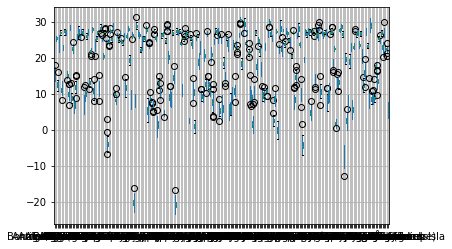

In [16]:
df_t_pivot.boxplot()

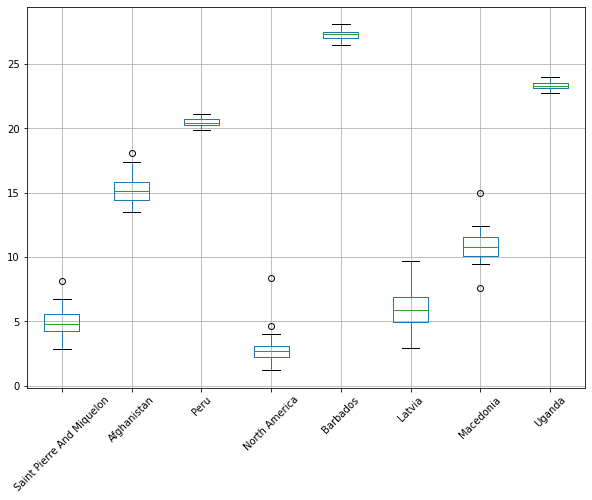

In [17]:
# boxplot de X paises aleatorios
df_t_pivot.T.sample(8).T.boxplot(rot= 45, figsize = (10,7))

Topic
https://data.worldbank.org/topic/climate-change

CO2 (kt)
https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2)
https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2)
https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM)
https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita)
https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC

In [18]:
!ls

API_19_DS2_en_csv_v2_2254744.csv
API_AG.LND.AGRI.K2_DS2_en_csv_v2_2255753.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_2255650.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_2256478.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2252956.csv
API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv
covid_19_data.csv
GlobalLandTemperaturesByCountry.csv
london_merged.csv
meteorite-landings.csv
poblacion.csv
test.csv
text.csv


In [49]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_2255753.csv', header = 2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_2255650.csv', header = 2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_2256478.csv', header = 2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2252956.csv', header = 2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv', header = 2)

In [20]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,

In [21]:
# generar lista de valores de los anios en formato str
range(1971,2015)
years = list(map(str, range(1971,2016)))
years[:5]

['1971', '1972', '1973', '1974', '1975']

In [22]:
# definicion de columnas a utilizar para formatear los datasets
cols = ['Country Name','Country Code'] + years
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [23]:
# convertir columnas que pueden ser indice a una sola columna
df_agri.loc[:, cols].melt(id_vars=['Country Name','Country Code'])

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11875,Kosovo,XKX,2015,NaN
11876,"Yemen, Rep.",YEM,2015,234326.0
11877,South Africa,ZAF,2015,963410.0
11878,Zambia,ZMB,2015,238360.0


In [24]:
df_agri.loc[:, cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns = {'variable':'date',
               'Country Name':'Country',
               'Country Code':'name',
               'value':'agriculture'})

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11875,Kosovo,XKX,2015,NaN
11876,"Yemen, Rep.",YEM,2015,234326.0
11877,South Africa,ZAF,2015,963410.0
11878,Zambia,ZMB,2015,238360.0


In [50]:
# función para dar el mismo formato a los diferentes datasets
def fun_format(df, col = 'agriculture'):
  df = df.loc[:, cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns = {'variable':'year',
               'Country Name':'Country',
               'Country Code':'name',
               'value': col})
  df['year'] = df['year'].astype(float)
  return df

In [51]:
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')
df_popu

,Country,name,year,population
0,Aruba,ABW,1971.0,59440.0
1,Afghanistan,AFG,1971.0,11475445.0
2,Angola,AGO,1971.0,6040777.0
3,Albania,ALB,1971.0,2187853.0
4,Andorra,AND,1971.0,25559.0
...,...,...,...,...
11875,Kosovo,XKX,2015.0,1788196.0
11876,"Yemen, Rep.",YEM,2015.0,26497889.0
11877,South Africa,ZAF,2015.0,55386367.0
11878,Zambia,ZMB,2015.0,15879361.0


In [42]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11880 non-null  object 
 1   name        11880 non-null  object 
 2   year        11880 non-null  float64
 3   population  11763 non-null  float64
dtypes: float64(2), object(2)
memory usage: 371.4+ KB


In [43]:
df_t_med

,Country,date,temperature,year
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [52]:
df_merge = pd.merge(df_t_med[['Country', 'temperature', 'year']],
                    df_popu, on = ['Country','year'], how = 'inner')

In [45]:
df_merge

,Country,temperature,year,name,population
0,Afghanistan,14.9340,1971,AFG,11475445.0
1,Afghanistan,13.8725,1972,AFG,11791215.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412950.0
4,Afghanistan,13.5130,1975,AFG,12689160.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0


In [53]:
# función para el merge de todos los datasets
def merge_dfs(df_merged,list_dfs):
  for df in list_dfs:
    df_merged = pd.merge(df_merged,
                         df,
                         on = ['Country', 'name', 'year'],
                         how = 'inner')
  return df_merged

In [54]:
df_merge = merge_dfs(df_merge, [df_co2e, df_elec, df_agri, df_fore])
df_merge

,Country,temperature,year,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475445.0,1895.839,NaN,380360.0,NaN
1,Afghanistan,13.8725,1972,AFG,11791215.0,1532.806,NaN,380460.0,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN
3,Afghanistan,13.6160,1974,AFG,12412950.0,1917.841,NaN,380480.0,NaN
4,Afghanistan,13.5130,1975,AFG,12689160.0,2126.860,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,179513.5
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7803.376,606.644199,162000.0,179052.8
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9622.208,636.249337,164000.0,178592.1
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7873.049,608.762505,162000.0,178131.4


# Análisis de los datos

In [55]:
df_climate = df_merge.dropna()

In [58]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,201,355.0
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [97]:
#eliminar notación cientifica
pd.set_option('display.float_format', '{:,.2f}'.format)

In [61]:
# filtro de 10 paises que más emiten co2
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [63]:
# dataset con los 10 paises
df_max_co2 = df_climate[df_climate['Country'].isin(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,year,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","614,030.0","3,482,729.3"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","615,332.5","3,482,258.3"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","614,650.0","3,481,787.4"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","613,970.0","3,481,316.4"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","613,290.0","3,480,845.5"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,089,470.0","3,082,016.0"
7005,United States,10.2,2010,USA,"309,321,666.0","5,395,532.1","13,395.1","4,069,917.0","3,087,200.0"
7006,United States,9.5,2011,USA,"311,556,874.0","5,270,047.4","13,247.0","4,050,364.0","3,089,950.0"
7007,United States,9.9,2012,USA,"313,830,990.0","5,082,000.0","12,966.1","4,030,810.5","3,092,700.0"


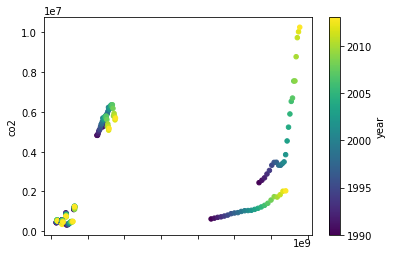

In [66]:
df_max_co2.set_index('Country').plot.scatter(
    x= 'population',
    y= 'co2',
    c= 'year',
    colormap='viridis')

In [67]:
df_climate.corr()

,temperature,year,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
year,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.1,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.1,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


In [68]:
import seaborn as sns

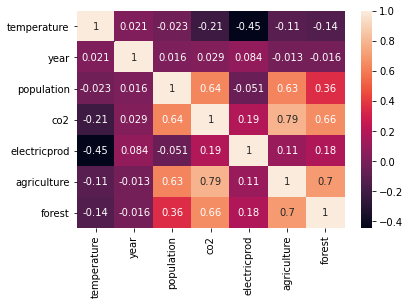

In [70]:
sns.heatmap(df_climate.corr(), annot=True)

In [72]:
df_med = df_climate.groupby('year').median()
df_med

,temperature,population,co2,electricprod,agriculture,forest
year,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","60,215.0"
1991,22.4,"10,346,663.5","26,714.1","1,072.5","91,870.0","63,349.1"
1992,19.9,"9,748,274.5","25,333.5","1,451.8","89,700.0","46,809.8"
1993,20.4,"9,964,675.0","27,641.8","1,525.8","88,180.0","46,096.0"
1994,20.5,"10,014,523.5","27,860.0","1,582.7","85,220.0","45,468.5"
1995,20.0,"10,081,493.5","29,400.2","1,606.4","77,575.0","44,901.8"
1996,19.9,"10,110,291.0","30,602.9","1,707.6","78,345.0","44,265.8"
1997,20.2,"10,112,988.5","30,823.0","1,782.6","79,280.0","43,629.8"
1998,21.2,"10,114,598.0","31,578.4","1,807.8","80,410.0","42,993.8"


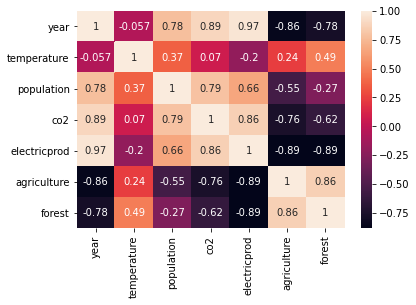

In [73]:
sns.heatmap(df_med.reset_index().corr(), annot=True)

In [74]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30ae799e50>,
      dtype=object)

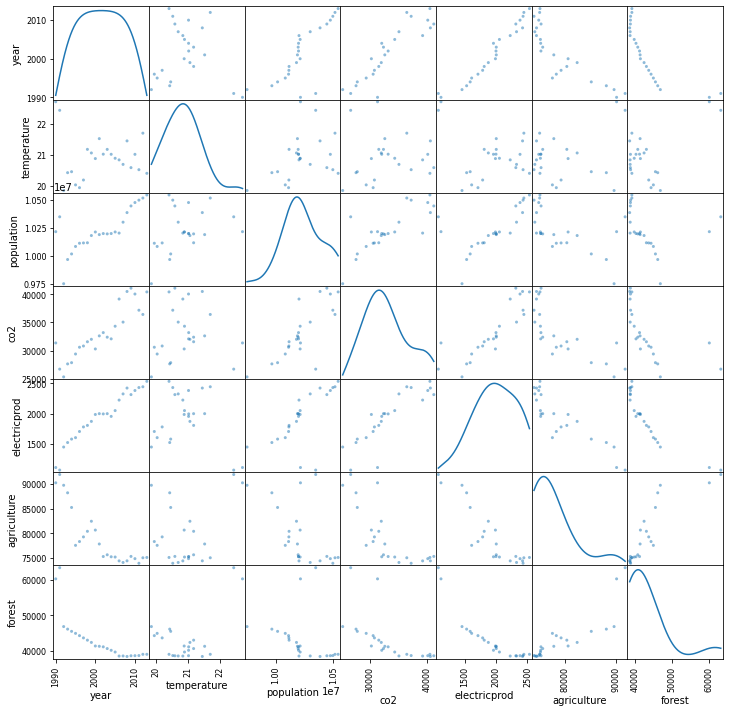

In [78]:
scatter_matrix(df_med.reset_index(), diagonal='kde', figsize=(12,12))

In [79]:
from pandas.plotting import parallel_coordinates

In [80]:
df_samerica = df_climate[df_climate['Country'].isin(['Colombia',
                                                     'Argentina',
                                                     'Bolivia',
                                                     'Mexico',
                                                     'Peru',
                                                     'Chile'])
][['Country',
   'temperature',
   'co2',
   'agriculture',
   'forest']]

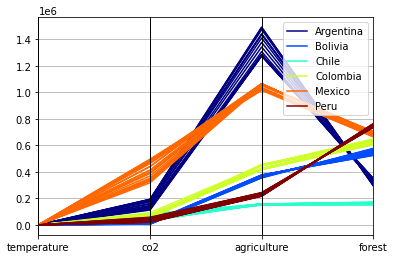

In [83]:
parallel_coordinates(df_samerica, 'Country',colormap='jet')